<a href="https://colab.research.google.com/github/NVishnevskaya/phys/blob/summer_practice_trial/task_1B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Условия и импорты

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import transforms

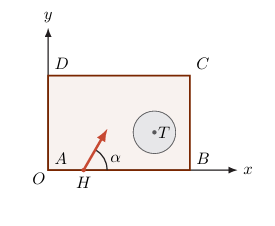

 Входные данные: a, b, ℓ, x, y, R, а также угол α между начальным направлением луча
 и осью Ox (0 < α < 180◦).
 Примечание: известно, что можно так подобрать параметры системы, что траектория
 луча вообще не будет иметь общих точек с выбранной окружностью, поэтому в
 программе задайте “большое” число отражений N∞ (условную “бесконечность”),
 преодоление которого соответствует ответу “никогда не пересечёт”.

 AB = a, BC = b

## Код и начальные условия

In [186]:
a, b, l, x, y, R, alpha = 10, 7, 3, 5, 5, 1, 30

In [187]:
def check_intersection_with_circle(cur_x, cur_y, center_x, center_y, R):
    return (cur_x - center_x) ** 2 + (cur_y - center_y) ** 2 <= R ** 2

 !Примечание: меняю цвет вектора, который контактирует с окружностью для наглядности - не подруземеваю изменение цвета самого луча

In [188]:
def trace_ray(AB, BC, l, x, y, R, alpha, to_show=True):
    # отображение исходных условий
    if to_show:
        # прямоугольник
        rect_color = "gray"
        plt.title("Ход движения луча")
        plt.axvline(x=0, color=rect_color)
        plt.axvline(x=a, color=rect_color)
        plt.axhline(y=0, color=rect_color)
        plt.axhline(y=b, color=rect_color)
        # заданный круг
        circle = plt.Circle((x, y), R, fill=False, color="r")
        plt.gca().add_patch(circle)
        # стартовая точка
        plt.scatter(l, 0, color="y")
    # счетчик и верхняя граница
    N_inf = 1e3
    reflect_quantity = 0
    # угол в радианах
    angle_in_radians = np.radians(alpha)
    # координаты старта луча
    cur_x = l
    cur_y = 0
    # сохранения предыдущих точек для графики
    prev_x = l
    prev_y = 0
    # параметры шагов (с помощью sin и cos -получаем направление)
    step_size = 1e-2
    d_x = np.cos(angle_in_radians)
    d_y = np.sin(angle_in_radians)

    # обработка случая, что луч уже находится в окружности
    if check_intersection_with_circle(prev_x, prev_y, x, y, R):
        print("Луч уже в окружности")
        return 0

    # для корректного подсчета
    reflect_flag = False
    # обработка в цикле
    while reflect_quantity <= N_inf:

        # обработка с пересечением окружности
        if check_intersection_with_circle(cur_x, cur_y, x, y, R):
            if reflect_flag:
                reflect_quantity += 1

            if to_show:
                # отображение вектора
                # дополнительно продлеваю, чтобы пересечение было заметно
                plt.quiver(
                    prev_x,
                    prev_y,
                    cur_x - prev_x + d_x,
                    cur_y - prev_y + d_y,
                    scale_units="xy",
                    scale=1,
                    color="g",
                    label=str(reflect_quantity),
                )
                # добавляю аннотацию посередине вектора
                ann_x, ann_y = (cur_x + prev_x) / 2, (cur_y + prev_y) / 2
                plt.annotate(
                    str(reflect_quantity),
                    xy=(ann_x, ann_y),
                    xytext=(ann_x, ann_y - 0.5),
                    ha="center",
                    va="center",
                    fontsize=12,
                    color="g",
                )
            print("Количество отражений до пересечения окружности: ", end="")
            return reflect_quantity

        # обработка случая с горизонтальным зеркалом
        if cur_x > a or cur_x < 0:
            reflect_quantity += 1
            if to_show:
                # отображение вектора
                plt.quiver(
                    prev_x,
                    prev_y,
                    cur_x - prev_x,
                    cur_y - prev_y,
                    scale_units="xy",
                    scale=1,
                    color="y",
                    label=str(reflect_quantity),
                    linewidths=1
                )
                # аннотация к вектору
                ann_x, ann_y = (cur_x + prev_x) / 2, (cur_y + prev_y) / 2
                plt.annotate(
                    str(reflect_quantity),
                    xy=(ann_x, ann_y),
                    xytext=(ann_x, ann_y - 0.5),
                    ha="center",
                    va="center",
                    fontsize=12,
                    color="y",
                )
            prev_x, prev_y = cur_x, cur_y
            d_x *= -1
            reflect_flag = True

        # обработка случая с вертикальной стенкой
        if cur_y > b or cur_y < 0:
            reflect_quantity += 1
            if to_show:
                # отображение вектора
                plt.quiver(
                    prev_x,
                    prev_y,
                    cur_x - prev_x,
                    cur_y - prev_y,
                    scale_units="xy",
                    scale=1,
                    color="y",
                )
                # подпись к вектору (где-то посередине)
                ann_x, ann_y = (cur_x + prev_x) / 2, (cur_y + prev_y) / 2
                plt.annotate(
                    str(reflect_quantity),
                    xy=(ann_x, ann_y),
                    xytext=(ann_x, ann_y - 0.5),
                    ha="center",
                    va="center",
                    fontsize=12,
                    color="y",
                )
            prev_x, prev_y = cur_x, cur_y
            d_y *= -1
            reflect_flag = True

        # обновление шага
        cur_x += d_x * step_size
        cur_y += d_y * step_size

    return "Окружность не пересечена"


Количество отражений до пересечения окружности: 

6

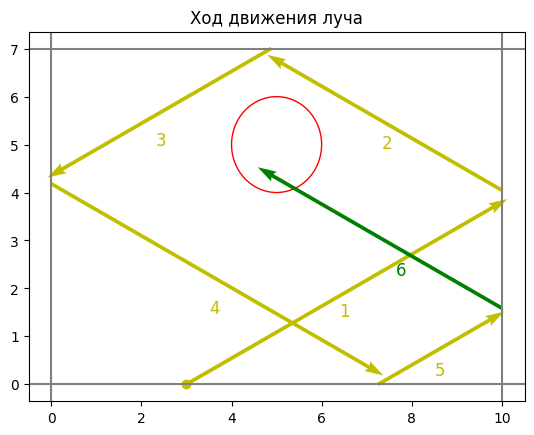

In [189]:
trace_ray(a, b, l, x, y, R, alpha)

In [190]:
trace_ray(a, b, l, x, y, R, alpha, to_show=False)

Количество отражений до пересечения окружности: 

6

## Проверка краевых случаев

Проверяю случай, когда пересечений быть не может

'Окружность не пересечена'

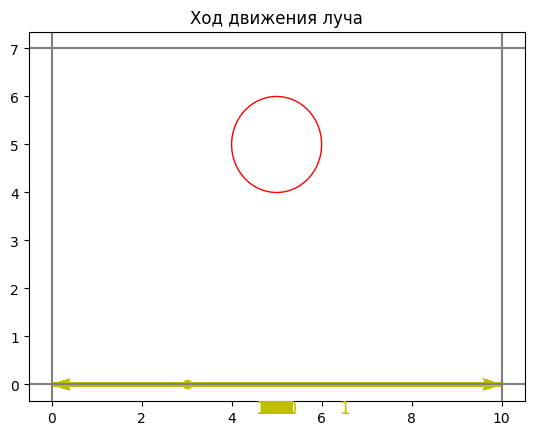

In [191]:
# визуализация просела
trace_ray(a, b, l, x, y, R, 0)

'Окружность не пересечена'

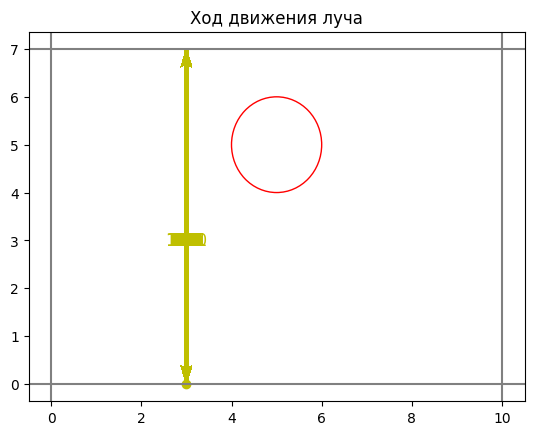

In [192]:
# визуализация просела
trace_ray(a, b, l, x, y, R, 90)

Количество отражений до пересечения окружности: 

0

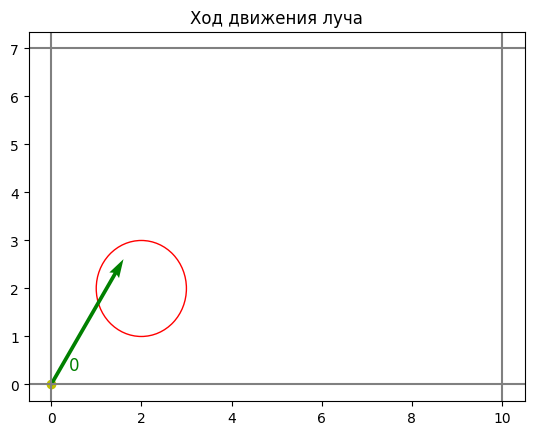

In [193]:
trace_ray(a, b, 0, 2,  2, 1, 60)

## Прочие тесты

Количество отражений до пересечения окружности: 

4

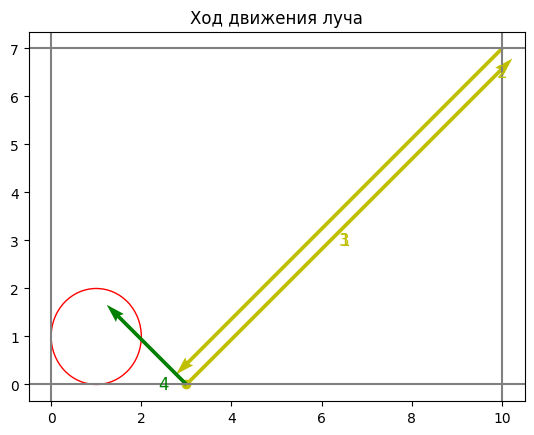

In [194]:
trace_ray(a, b, l, 1, 1, R, 45)

Количество отражений до пересечения окружности: 

8

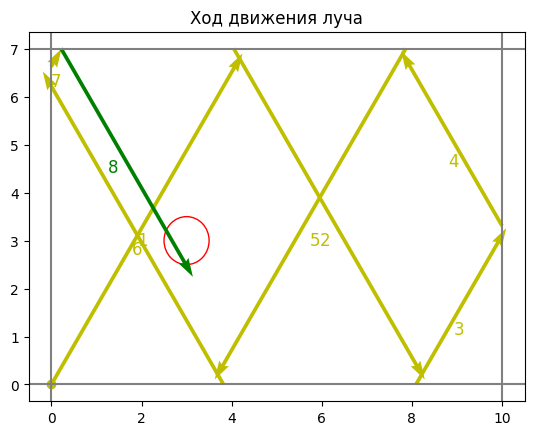

In [195]:
trace_ray(a, b, 0, 3,  3, 0.5, 60)

Количество отражений до пересечения окружности: 

9

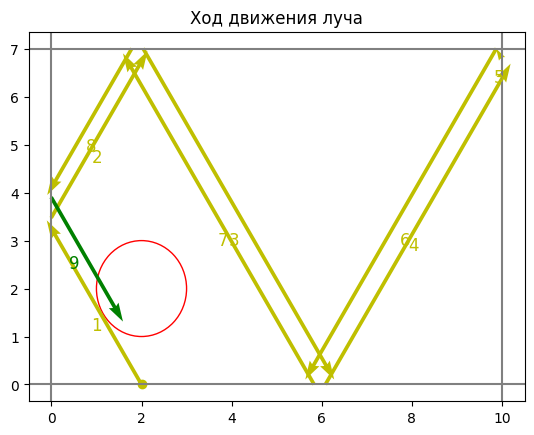

In [196]:
trace_ray(a, b, 2, 2,  2, 1, 120)

Количество отражений до пересечения окружности: 

117

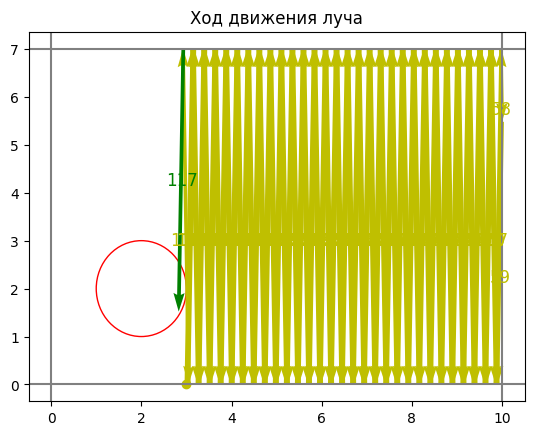

In [198]:
trace_ray(a, b, 3, 2, 2, 1, 89)

## Выводы по реализации
При большом количестве отражений визуализация выглядит непрезентабельно - в дальнейшем стоит настроить толщину векторов.